# Step 1. Importing Module & Data 

In [2]:
import warnings
warnings.filterwarnings('ignore')

import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
fashion_train_df = pd.read_csv(f'C:\\Users\\gyumin1009\\Desktop\\Projects\\raw_data\\fashion MNIST\\fashion-mnist_train.csv', sep =',')
fashion_test_df = pd.read_csv(f'C:\\Users\\gyumin1009\\Desktop\\Projects\\raw_data\\fashion MNIST\\fashion-mnist_test.csv', sep =',')

# Step 2. Visualization of the Dataset

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

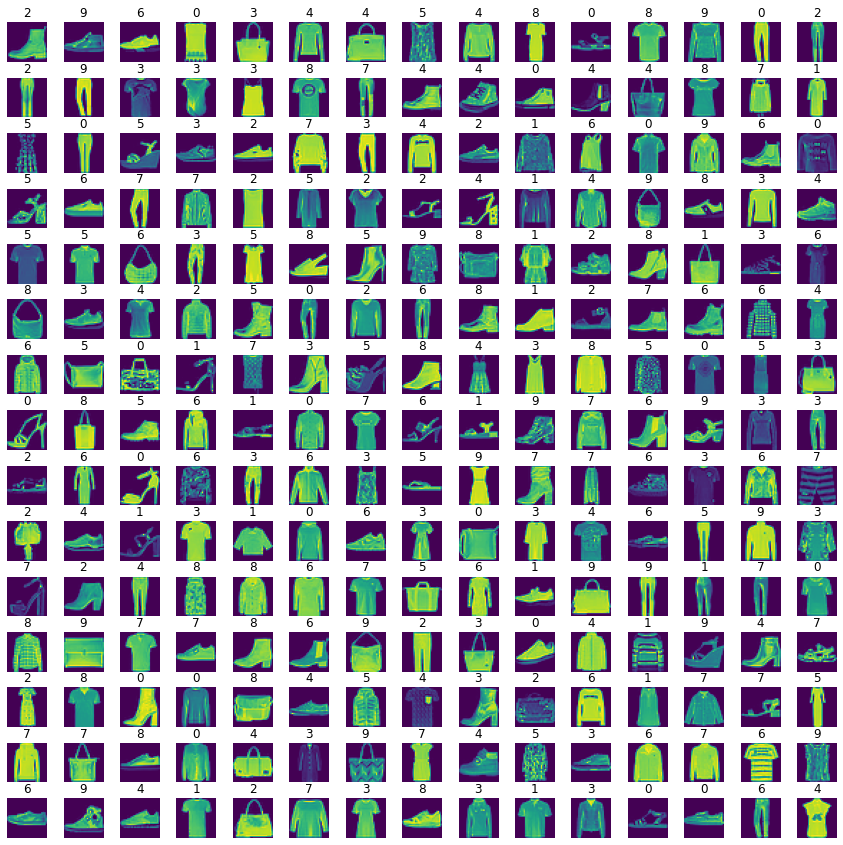

In [10]:
L_grid = 15
W_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(60000)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[i,0]))
    
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Step 4. Train the Model

In [11]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [12]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_valid = X_valid.reshape(X_valid.shape[0], *(28, 28, 1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_valid.shape

(12000, 28, 28, 1)

In [19]:
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [44]:
cnn_model = Sequential()

In [45]:
cnn_model.add(Conv2D(128, 3, 3, input_shape = (28, 28, 1), activation='relu')) # 적용할 커널의 수를 정해야함

In [46]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [47]:
cnn_model.add(Flatten())

In [48]:
cnn_model.add(Dense(128, activation= 'relu'))

In [49]:
cnn_model.add(Dense(10, activation= 'sigmoid'))

In [50]:
cnn_model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [51]:
epochs = 50

In [52]:
cnn_model.fit(X_train, 
              y_train,
              batch_size=512,
              epochs=epochs,
              verbose=1,
              validation_data= (X_valid, y_valid))

Epoch 1/50
94/94 [==============================] - 1s 10ms/step - loss: 0.9152 - sparse_categorical_accuracy: 0.7032 - val_loss: 0.5917 - val_sparse_categorical_accuracy: 0.7829
Epoch 2/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5373 - sparse_categorical_accuracy: 0.8046 - val_loss: 0.5187 - val_sparse_categorical_accuracy: 0.8092
Epoch 3/50
94/94 [==============================] - 1s 8ms/step - loss: 0.4791 - sparse_categorical_accuracy: 0.8255 - val_loss: 0.4584 - val_sparse_categorical_accuracy: 0.8332
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4442 - sparse_categorical_accuracy: 0.8384 - val_loss: 0.4346 - val_sparse_categorical_accuracy: 0.8428
Epoch 5/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4195 - sparse_categorical_accuracy: 0.8477 - val_loss: 0.4249 - val_sparse_categorical_accuracy: 0.8422
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4006 - sparse_categorical_accuracy:

Epoch 47/50
94/94 [==============================] - 1s 8ms/step - loss: 0.1967 - sparse_categorical_accuracy: 0.9286 - val_loss: 0.3236 - val_sparse_categorical_accuracy: 0.8870
Epoch 48/50
94/94 [==============================] - 1s 8ms/step - loss: 0.1949 - sparse_categorical_accuracy: 0.9282 - val_loss: 0.3234 - val_sparse_categorical_accuracy: 0.8875
Epoch 49/50
94/94 [==============================] - 1s 8ms/step - loss: 0.1889 - sparse_categorical_accuracy: 0.9308 - val_loss: 0.3282 - val_sparse_categorical_accuracy: 0.8858
Epoch 50/50
94/94 [==============================] - 1s 8ms/step - loss: 0.1841 - sparse_categorical_accuracy: 0.9329 - val_loss: 0.3353 - val_sparse_categorical_accuracy: 0.8840


In [53]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3132 - sparse_categorical_accuracy: 0.8905
Test Accuracy : 0.891


In [54]:
y_prob = cnn_model.predict(X_test, verbose=0) 
predicted_classes = y_prob.argmax(axis=-1)

In [55]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

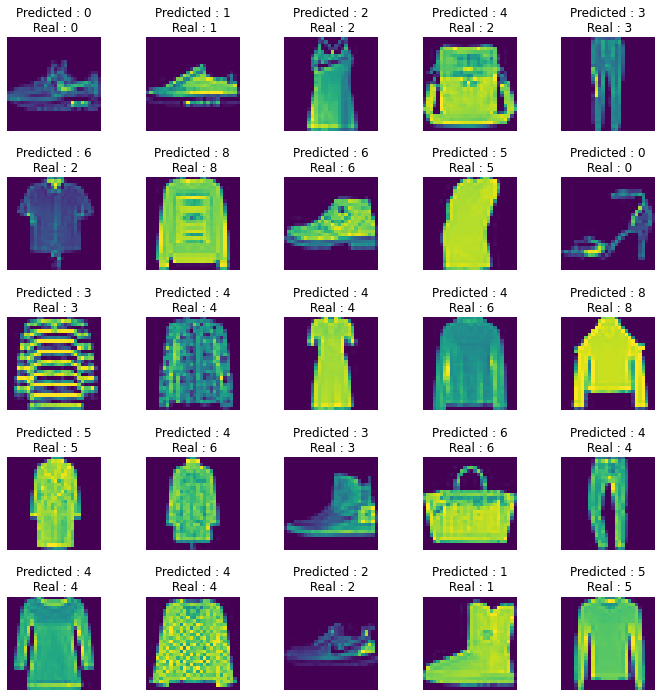

In [56]:
L_grid = 5
W_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(60000)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(f"Predicted : {int(predicted_classes[i])}\n Real : {int(y_test[i])}")
    
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.5)

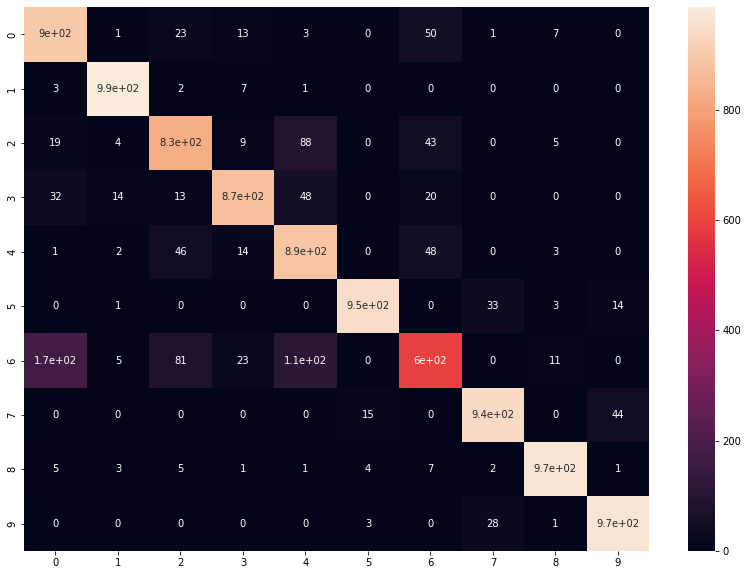

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True);

In [58]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = {"Class {}".format(i) for i in range(num_classes)}

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 5       0.79      0.90      0.84      1000
     Class 6       0.97      0.99      0.98      1000
     Class 1       0.83      0.83      0.83      1000
     Class 3       0.93      0.87      0.90      1000
     Class 7       0.78      0.89      0.83      1000
     Class 4       0.98      0.95      0.96      1000
     Class 8       0.78      0.60      0.68      1000
     Class 0       0.94      0.94      0.94      1000
     Class 2       0.97      0.97      0.97      1000
     Class 9       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

